# SVM

## Load dataset

In [162]:
import cv2
import matplotlib.image as mplib 
from PIL import Image
import numpy as np

def cancerous_classify_data(labelNames, root):    
    images = list()
    labels = list()
    
    for label in labelNames:
        # get image directory
        img_dir = os.path.join(root, f"{label}")
        
        for img in os.listdir(img_dir):
            img = np.array(Image.open(os.path.join(img_dir, img),'r'))
            images.append(img)
            labels.append(int(label))
        
    return (images, labels)

In [166]:
train_path = "/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/split_binary-task/train"
train_X, train_Y = cancerous_classify_data([0, 1], root= train_path)

In [168]:
val_path = "/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/split_binary-task/val"
val_X, val_Y = cancerous_classify_data(["0", "1"], root= val_path)

In [169]:
print(np.asarray(train_X).shape)

(16223, 27, 27, 3)


In [ ]:
# import tensorflow as tf
# train_X = tf.image.rgb_to_grayscale(train_X)
# train_X.shape

2022-05-01 22:24:42.925758: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([16223, 27, 27, 1])

## Reshape and normalize data

In [170]:
reshaped_train_X = np.asarray(train_X).reshape((len(train_X), -1))
reshaped_train_X.shape

(16223, 2187)

In [171]:
reshaped_train_X = reshaped_train_X / 255.0

## PCA

In [173]:
from sklearn.decomposition import PCA
 
pca = PCA(200) # we need 2 principal components.
pca.fit(reshaped_train_X)
transformed_train_X = pca.transform(reshaped_train_X)
transformed_train_X.shape

(16223, 200)

In [174]:
print(np.sum(pca.explained_variance_ratio_) )

0.925254124988931


## After PCA transform

In [175]:
images_inverted = pca.inverse_transform(transformed_train_X)
images_inverted[:5].shape

(5, 2187)

In [176]:
images_inverted.shape

(16223, 2187)

In [177]:
images_inverted = images_inverted.reshape(np.asarray(train_X).shape)
images_inverted.shape

(16223, 27, 27, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

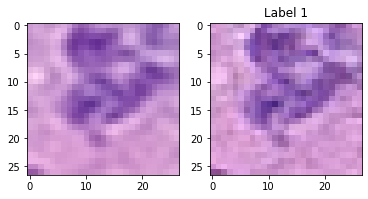

In [186]:
import matplotlib.pyplot as plt
#viewing the compressed image
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2) 
noImage = 15420
plt.title("Label %s"% train_Y[noImage])
axarr[0].imshow(images_inverted[noImage])
axarr[1].imshow(train_X[noImage])


## Train SVM

In [179]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.001,kernel="rbf", tol=1e-3, verbose=False,random_state=4)

### Cross-validation Score of SVM

In [180]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, transformed_train_X, train_Y, cv=10)
scores

array([0.85582255, 0.86075169, 0.85274184, 0.85758323, 0.87114673,
       0.86004932, 0.86251541, 0.86251541, 0.86189889, 0.85819975])

### Test score

In [181]:
reshaped_val_X = np.asarray(val_X).reshape((len(val_X), -1)) / 255.0
print("Flatten valX shape: ",reshaped_val_X.shape)
transformed_val_X = pca.transform(reshaped_val_X)
print("Transformed valX shape: ",transformed_val_X.shape)


Flatten valX shape:  (4057, 2187)
Transformed valX shape:  (4057, 200)


In [182]:
classifier.fit(transformed_train_X,train_Y)
classifier.score(transformed_val_X, val_Y)

0.8664037466107961

In [183]:
pred_y = classifier.predict(transformed_val_X)

In [184]:
from sklearn.metrics import classification_report
print(classification_report(val_Y, pred_y))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2643
           1       0.81      0.80      0.81      1414

    accuracy                           0.87      4057
   macro avg       0.85      0.85      0.85      4057
weighted avg       0.87      0.87      0.87      4057

